Problem - 1: Perform a classification task with knn from scratch.

1. Load the Dataset:

In [8]:
import pandas as pd

#Load the datasets
df=pd.read_csv('diabetes.csv')
df.head() #display first few rows


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
#Check for datatypes
print(df.dtypes)

print()
#For statistical summary
print("Statistical Summary:")
print(df.describe())

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Statistical Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000  

2. Handle Missing Data:

Answer: There is no missing values.

In [10]:
#Checking for missing values
missing_value = df.isnull().sum() / len(df) *100
print(missing_value)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


3. Feature Engineering:

• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [11]:
import numpy as np
# Separate features (X) and target (y)
X = df.drop(columns=['Outcome']).values  # Convert features to a NumPy array
y = df['Outcome'].values  # Convert target to a NumPy array

# Define a custom train-test split function from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)  # Set random seed for reproducibility
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle indices
    test_split_size = int(len(X) * test_size)  # Calculate the size of the test set
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# Output shapes to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.


In [12]:
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Arguments:
    point1 : np.ndarray
        The first point as a numpy array.
    point2 : np.ndarray
        The second point as a numpy array.

    Returns:
    float
        The Euclidean distance between the two points.

    Raises:
    ValueError: If the input points do not have the same dimensionality or are not numeric.
    """
    # Ensure both points are numeric (convert to floats if necessary)
    point1 = np.array(point1, dtype=float)
    point2 = np.array(point2, dtype=float)

    # Check if the points are of the same dimension
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")

    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2)**2))
    return distance

# Test case for the function
try:
    # Define two points
    point1 = np.array([3, 4])
    point2 = np.array([0, 0])

    # Calculate the distance
    result = euclidean_distance(point1, point2)

    # Check if the result matches the expected value (e.g., sqrt(3^2 + 4^2) = 5)
    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Test passed successfully!


• Write functions for:
– Predicting the class for a single query.

– Predicting classes for all test samples.

In [13]:
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.

    Arguments:
    query : np.ndarray
        The query point for which the prediction is to be made.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    int
        The predicted class label for the query.
    """
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()

    return prediction


In [14]:
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.

    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


Test Function

In [15]:
try:
    # Define the test set for the test case
    X_test_sample = X_test[:5]  # Taking a small subset for testing
    y_test_sample = y_test[:5]  # Corresponding labels for the subset

    # Make predictions
    predictions = knn_predict(X_test_sample, X_train, y_train, k=3)

    # Print test results
    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)

    # Check if predictions match expected format
    assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."

    print("Test case passed successfully!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Predictions: [0 1 0 1 1]
Actual labels: [0 0 0 0 0]
Test case passed successfully!


• Evaluate the performance using accuracy.

In [16]:
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.

    Arguments:
    y_true : np.ndarray
        The true labels.
    y_pred : np.ndarray
        The predicted labels.

    Returns:
    float : The accuracy as a percentage (0 to 100).
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

try:
    # Make predictions on the entire test set
    predictions = knn_predict(X_test, X_train, y_train, k=3)

    # Compute the accuracy
    accuracy = compute_accuracy(y_test, predictions)

    # Print the accuracy
    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")


Accuracy of the KNN model on the test set: 67.39%


Problem - 2 - Experimentation:
1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

In [17]:
import numpy as np

# Step 1: Calculate the mean and standard deviation for each feature (column)
mean = np.mean(X_train, axis=0)
std_dev = np.std(X_train, axis=0)

# Step 2: Scale the feature matrix (X_train and X_test)
X_train_scaled = (X_train - mean) / std_dev  # Subtract the mean and divide by the std deviation
X_test_scaled = (X_test - mean) / std_dev    # Apply the same transformation to the test data

# Step 3: Run kNN on the scaled data
predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)

# Step 4: Compute the accuracy of the scaled dataset
accuracy_scaled = compute_accuracy(y_test, predictions_scaled)
print(f"Accuracy of kNN on the scaled dataset: {accuracy_scaled:.2f}%")


Accuracy of kNN on the scaled dataset: 70.87%


Comparative analysis
????

Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:  

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.

2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.



Accuracy for k=1 (Original): 68.70%, Time Taken: 0.8494 seconds
Accuracy for k=2 (Original): 68.70%, Time Taken: 0.8610 seconds
Accuracy for k=3 (Original): 67.39%, Time Taken: 0.8989 seconds
Accuracy for k=4 (Original): 68.26%, Time Taken: 0.8278 seconds
Accuracy for k=5 (Original): 68.70%, Time Taken: 0.8933 seconds
Accuracy for k=6 (Original): 68.70%, Time Taken: 0.8692 seconds
Accuracy for k=7 (Original): 69.13%, Time Taken: 0.9427 seconds
Accuracy for k=8 (Original): 69.13%, Time Taken: 0.8620 seconds
Accuracy for k=9 (Original): 70.00%, Time Taken: 0.8749 seconds
Accuracy for k=10 (Original): 70.43%, Time Taken: 0.8748 seconds
Accuracy for k=11 (Original): 73.04%, Time Taken: 0.8688 seconds
Accuracy for k=12 (Original): 72.61%, Time Taken: 1.5008 seconds
Accuracy for k=13 (Original): 74.35%, Time Taken: 1.5237 seconds
Accuracy for k=14 (Original): 72.17%, Time Taken: 0.8474 seconds
Accuracy for k=15 (Original): 73.91%, Time Taken: 0.9112 seconds
Accuracy for k=1 (Scaled): 63.48%,

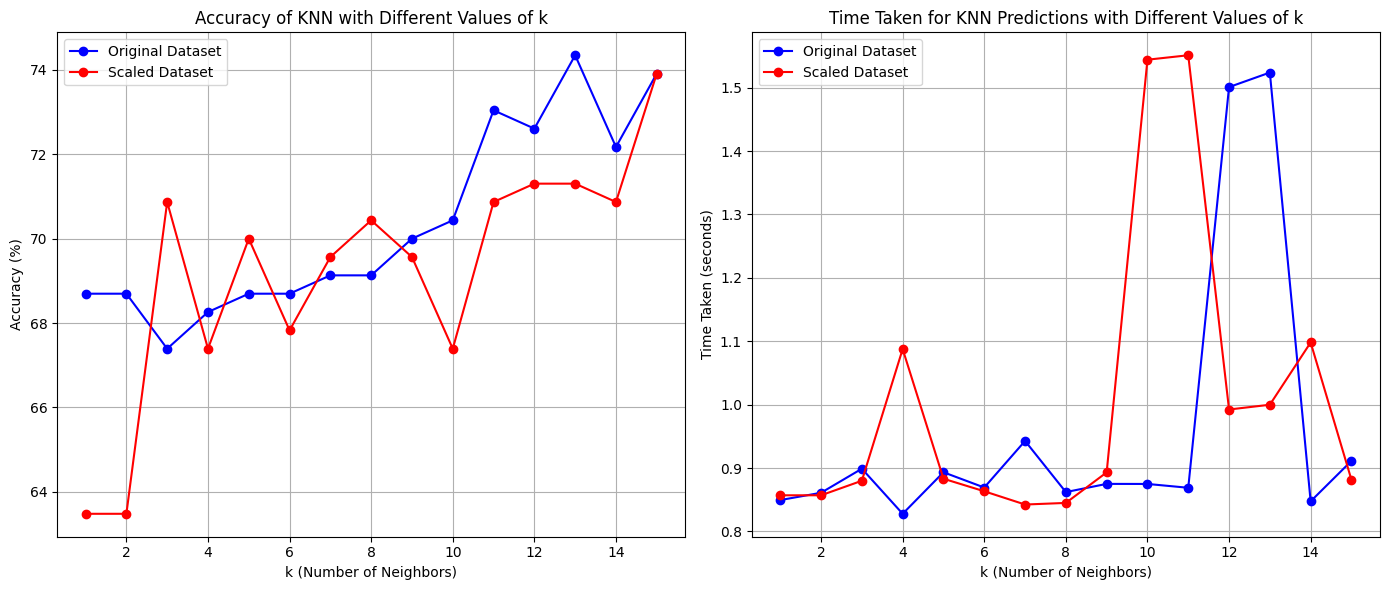

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Get neighbors based on Euclidean distance
def get_neighbors(X_train, y_train, test_point, k):
    distances = []
    for i, train_point in enumerate(X_train):  # Iterate directly through the NumPy array
        dist = euclidean_distance(train_point, test_point)
        distances.append((dist, y_train[i]))  # Append distance and corresponding target
    distances.sort(key=lambda x: x[0])  # Sort by distance
    return distances[:k]  # Return the k nearest neighbors

# Predict the class for a single query point
def predict_class(X_train, y_train, test_point, k):
    neighbors = get_neighbors(X_train, y_train, test_point, k)
    class_votes = {}
    for _, label in neighbors:
        if label in class_votes:
            class_votes[label] += 1
        else:
            class_votes[label] = 1
    return max(class_votes, key=class_votes.get)

# Predict classes for all test samples
def predict_all(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:  # Iterate through NumPy array
        predicted_class = predict_class(X_train, y_train, test_point, k)
        predictions.append(predicted_class)
    return predictions

# Compute accuracy
def compute_accuracy(y_true, y_pred):
    correct = sum(y_true == y_pred)
    return (correct / len(y_true)) * 100  # Return as percentage

# Function to test KNN on different values of k and plot the accuracies and time taken
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values, dataset_type="Original"):
    """
    Run KNN predictions for different values of k and plot the accuracies and time taken for each k.

    Arguments:
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    X_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.
    dataset_type : str
        A label for the dataset type, either 'Original' or 'Scaled'.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}
    times_taken = {}

    for k in k_values:
        # Measure the time taken for predictions
        start_time = time.time()
        predictions = predict_all(X_train, y_train, X_test, k)
        end_time = time.time()

        # Compute the accuracy
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        times_taken[k] = end_time - start_time

        print(f"Accuracy for k={k} ({dataset_type}): {accuracy:.2f}%, Time Taken: {times_taken[k]:.4f} seconds")

    return accuracies, times_taken

# Define the range of k values to experiment with
k_values = range(1, 16)

# Run the experiment on the original dataset
accuracies_original, times_taken_original = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values, dataset_type="Original")

# Run the experiment on the scaled dataset
accuracies_scaled, times_taken_scaled = experiment_knn_k_values(X_train_scaled, y_train, X_test_scaled, y_test, k_values, dataset_type="Scaled")

# Plot the results in one graph
plt.figure(figsize=(14, 6))

# Plot k vs Accuracy for both original and scaled datasets
plt.subplot(1, 2, 1)
plt.plot(k_values, list(accuracies_original.values()), marker='o', color='b', label='Original Dataset')
plt.plot(k_values, list(accuracies_scaled.values()), marker='o', color='r', label='Scaled Dataset')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of KNN with Different Values of k')
plt.legend()
plt.grid(True)

# Plot k vs Time Taken for both original and scaled datasets
plt.subplot(1, 2, 2)
plt.plot(k_values, list(times_taken_original.values()), marker='o', color='b', label='Original Dataset')
plt.plot(k_values, list(times_taken_scaled.values()), marker='o', color='r', label='Scaled Dataset')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken for KNN Predictions with Different Values of k')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
